# Locality-Sensitive Hashing (LSH) with Weighted MinHash for DNA Analysis



**Name:**

**Student Number:**



This notebook explores advanced DNA similarity analysis using Locality-Sensitive Hashing (LSH) and Weighted MinHash. It includes:

1. **Weighted MinHash**: Incorporates k-mer weights based on frequency for enhanced similarity computation.
2. **LSH Bands**: Improves efficiency by narrowing down candidate sequence pairs using signature partitioning.
3. **Real-World Applications**:
   - Genome alignment: Identify the most similar sequence to a reference.
   - Duplicate detection: Detect sequences with high similarity.

### Workflow:
- **Step 1**: Generate a random DNA sequence and create mutated variants.
- **Step 2**: Extract k-mers and assign weights based on their frequency.
- **Step 3**: Compute Weighted MinHash signatures for the reference and dataset sequences.
- **Step 4**: Partition signatures into LSH bands and compute Jaccard similarity.
- **Step 5**: Apply results to real-world applications (genome alignment and duplicate detection).


### Import Libraries


In [14]:
import random
import hashlib
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


## Step 1: Dataset Generation

### Objective:
Generate a synthetic DNA dataset for similarity analysis. This includes:
- A **reference sequence**: A random DNA sequence of a specified length.
- A **dataset**: A list of DNA sequences derived from the reference sequence by introducing random mutations.

### Instructions for Implementation:
1. Create a function to generate a random DNA sequence. Use `random.choices` to randomly select characters from 'A', 'C', 'G', and 'T'.
2. Create a function to introduce mutations into a DNA sequence:
   - Replace a random number of characters in the sequence with different nucleotides.
   - Ensure the mutations do not revert to the original character.

### Example:
- Generate a reference DNA sequence of 1000 characters.
- Create 20 mutated sequences with 50–150 mutations each.


In [30]:
def generate_dna_sequence(length):
    """
    Generates a random DNA sequence of given length.
    :param length: Length of the DNA sequence.
    :return: Random DNA sequence of ACGT.
    """
    pass

def mutate_sequence(sequence, num_mutations):
    """
    Introduces random mutations in a DNA sequence.
    :param sequence: Original DNA sequence.
    :param num_mutations: Number of mutations to introduce.
    :return: Mutated DNA sequence.
    """
    pass

# Generate reference sequence and dataset
reference_seq = generate_dna_sequence(1000)
dataset = [mutate_sequence(reference_seq, random.randint(10, 50)) for _ in range(40)]


print(f"{reference_seq}\n")

for i in range(len(dataset)):
    print(dataset[i])


ATGCACAACGAGTGTGCGCACATCTTTCCTACATCATCGGAGAGGGAAGACTCATCGAGGGAGGCTCGGATCGCATTTATTAATCACGAACTCGACTGCAACTGATCCTCATGGGCGTGCAGTGACCTACACGTGGCACCCCGCTTCCCATCCGATGGTAAGCATCCTCCCTGAGCATCATACGCTGGTACCGATCTTGGAAGTAGAATACAGAGCCGGACGCTTGAGACCTAAAATAAAAAGAACTATGTTGAATCGAGTAAATCCTTTTATCATTGCGCGTGGACTGGATGTCATGTCAAGGCCTTTGCACAGCCCCCTCTTGCTCTATCTGGTGAGGGCAGTGCTGCGTGACCCGAACAGAGGGGACTTGCCCCGTCAATCGGCTATGCGGCCAATACCGAGTGACGCTCTGCGTCCTTTACCCCCTAAGAATATTACGGACAGTGGATGTCACAGACGAAGTAGCGTAGATATTTCTGTAGATTGCGCCTCACTGAGTGGGCATAATGGGTACGTCTGAGGGCACGGAAATCGAGACGCTTCGGCGCAGGGCCTATGGCTCTTGAACTTTGAAACGTTCTCCAAATAGGTGTTTGCAGAGAGAAGGAACCAGCTGGCGACCTTGCCGAGACTATCGATCCGCGTGTGAAGAGTCCCGTGAAATTTTGTAATAGATACAAGGCCGATATCGTCGACTTCGATCTGCCGCGGTATATTTAGGACAATCGAGATAAATAGGCGCCAGACGGCAGGAACCGTTGAATTGATTACCACTAGGAATCTCGTTTGCTAGCCGATTATATACCTCGTTTCCCTAAACTGTGTTACCCGCTATGTGATGCAACACTATACCGCTTGTAACATGGACCTGGGAGCAGGAGCACCCGTGAGATCGTGCAACGGAACCAACGTCCTTTGCTACGCTCAAAATACTGCCCTGTAATGGAGGCATTCCCCGATGAGAGACTGGGAGTAGCACGCGGCCGGATAGGACATA

## Step 2: Weighted Shingling

### Objective:
Extract k-mers from DNA sequences and calculate their frequencies to assign weights.

### Instructions for Implementation:
1. Create a function to extract all overlapping substrings of length `k` from a DNA sequence. These substrings are called **k-mers**.
2. Count the frequency of each k-mer in the sequence and store these counts as weights in a dictionary.

### Example:
For the sequence `ACTGACTG` and `k=3`:
- Extract k-mers: `['ACT', 'CTG', 'TGA', 'GAC', 'ACT', 'CTG']`
- Count frequencies: `{'ACT': 2, 'CTG': 2, 'TGA': 1, 'GAC': 1}`


In [31]:
from collections import Counter

def generate_weighted_kmers(sequence, k):
    """
    Generates k-mers and their weights based on frequency.
    """
    pass

k = 6
reference_kmers = generate_weighted_kmers(reference_seq, k)
dataset_kmers = [generate_weighted_kmers(seq, k) for seq in dataset]


print(dataset_kmers)


[{'ATGCAC': 1, 'TGCACA': 1, 'GCACAA': 1, 'CACAAC': 1, 'ACAACG': 1, 'CAACGA': 1, 'AACGAG': 1, 'ACGAGT': 1, 'CGAGTG': 2, 'GAGTGT': 1, 'AGTGTG': 1, 'GTGTGC': 1, 'TGTGCG': 1, 'GTGCGC': 1, 'TGCGCA': 1, 'GCGCAC': 1, 'CGCACA': 1, 'GCACAT': 1, 'CACATC': 1, 'ACATCT': 1, 'CATCTT': 1, 'ATCTTT': 1, 'TCTTTC': 1, 'CTTTCC': 1, 'TTTCCT': 2, 'TTCCTA': 1, 'TCCTAC': 1, 'CCTACA': 2, 'CTACAT': 1, 'TACATG': 1, 'ACATGA': 1, 'CATGAT': 1, 'ATGATC': 1, 'TGATCG': 1, 'GATCGG': 1, 'ATCGGA': 1, 'TCGGAG': 1, 'CGGAGA': 1, 'GGAGAG': 1, 'GAGAGG': 1, 'AGAGGG': 2, 'GAGGGA': 3, 'AGGGAA': 2, 'GGGAAA': 2, 'GGAAAA': 1, 'GAAAAC': 1, 'AAAACT': 1, 'AAACTC': 1, 'AACTCA': 1, 'ACTCAT': 1, 'CTCATC': 1, 'TCATCG': 1, 'CATCGA': 1, 'ATCGAG': 4, 'TCGAGG': 1, 'CGAGGG': 1, 'AGGGAG': 1, 'GGGAGG': 1, 'GGAGGC': 2, 'GAGGCT': 1, 'AGGCTC': 1, 'GGCTCG': 1, 'GCTCGG': 1, 'CTCGGA': 1, 'TCGGAT': 1, 'CGGATC': 1, 'GGATCG': 1, 'GATCGC': 1, 'ATCGCA': 1, 'TCGCAT': 1, 'CGCATT': 1, 'GCATTC': 2, 'CATTCA': 1, 'ATTCAT': 1, 'TTCATT': 1, 'TCATTA': 2, 'CATTAA': 

## Step 3: Weighted MinHash

### Objective:
Generate compact signatures for DNA sequences using Weighted MinHash. These signatures allow fast approximate similarity computation.

### Instructions for Implementation:
1. Generate multiple independent hash functions:
   - Each hash function should map a k-mer into a fixed-size bucket range.
   - Use Python's `hashlib` to create hash functions based on a unique seed.

2. Compute a Weighted MinHash signature for a DNA sequence:
   - For each hash function:
     - Compute the hash value of all k-mers in the sequence.
     - Divide each hash value by the corresponding k-mer's weight (frequency).
     - Select the smallest weighted hash value.

3. Return the MinHash signature as a list of the smallest hash values across all hash functions.

### Example:
For k-mers `{'ACT': 2, 'CTG': 1}` and hash functions `h1` and `h2`:
- Compute hash values: `h1(ACT) = 50, h1(CTG) = 30`
- Compute weighted values: `50/2 = 25, 30/1 = 30`
- MinHash for `h1`: `25`


In [32]:
import hashlib

def generate_hash_functions(num_hashes, max_bucket):
    """
    Generates multiple independent hash functions.
    """
    pass

def weighted_minhash_signature(weighted_kmers, hash_functions):
    """
    Generates a Weighted MinHash signature for a set of weighted k-mers.
    """
    pass

# Generate hash functions
num_hashes = 50
max_bucket = 2**32 - 1
hash_functions = generate_hash_functions(num_hashes, max_bucket)

# Compute Weighted MinHash signatures
reference_signature = weighted_minhash_signature(reference_kmers, hash_functions)
dataset_signatures = [weighted_minhash_signature(kmers, hash_functions) for kmers in dataset_kmers]

print(f"Reference Signature: {reference_signature}")
for i, signature in enumerate(dataset_signatures):
    print(f"Dataset Signature {i}: {signature}")


Reference Signature: [466804.0, 1395160.0, 11173545.0, 210843.0, 1968131.0, 12057557.0, 1125990.0, 8473908.0, 6312092.0, 4342805.0, 27416.0, 3502480.0, 3296443.0, 1507625.0, 6199855.5, 4262698.0, 9275796.0, 2632796.0, 12299156.0, 71820.0, 9038501.0, 4705494.0, 3822778.0, 306267.0, 2550652.0, 268884.0, 2529264.0, 4405162.0, 3464169.0, 3172942.0, 2391674.0, 8378579.0, 5251038.0, 11330403.0, 6770553.0, 7093921.0, 4780020.0, 8238284.0, 3810716.0, 1736584.0, 1904463.0, 1057736.0, 1013382.6666666666, 1719239.0, 968022.0, 1635581.0, 10777448.0, 919536.0, 1096284.0, 2107266.0]
Dataset Signature 0: [233402.0, 1799022.0, 11173545.0, 210843.0, 1968131.0, 10639916.0, 1125990.0, 8473908.0, 3841983.3333333335, 4342805.0, 27416.0, 3502480.0, 3296443.0, 1507625.0, 12399711.0, 1138845.0, 13029437.0, 5265592.0, 12299156.0, 71820.0, 9038501.0, 4705494.0, 3822778.0, 306267.0, 2550652.0, 8575106.0, 2529264.0, 4405162.0, 3464169.0, 3172942.0, 2391674.0, 8378579.0, 8430774.5, 11330403.0, 8311244.0, 7093921.0

## Step 4: Locality-Sensitive Hashing (LSH) Bands

### Objective:
Partition MinHash signatures into bands to efficiently identify similar sequences.

### Instructions for Implementation:
1. Split the MinHash signature into `num_bands` equal-sized bands.
2. For each band, compute a hash value for the band (a tuple of signature values).
3. Group sequences into buckets based on the band hash:
   - Sequences in the same bucket are considered similar candidates for further comparison.

### Example:
For a signature `[25, 30, 15, 50]` and `num_bands=2`:
- Split into bands: `[(25, 30), (15, 50)]`
- Compute hash values: `hash((25, 30))`, `hash((15, 50))`


In [33]:
def lsh_buckets(signature, num_bands):
    """
    Partition a MinHash signature into LSH buckets.
    """
    pass

# Create LSH buckets
num_bands = 10
reference_buckets = lsh_buckets(reference_signature, num_bands)
dataset_buckets = [lsh_buckets(signature, num_bands) for signature in dataset_signatures]



## Step 5: Similarity Computation

### Objective:
Compare sequences based on their Weighted MinHash signatures.

### Instructions for Implementation:
1. Create a function to compute Jaccard similarity between two signatures:
   - Compare the number of matching hash values across all hash functions.
   - Divide the number of matches by the total number of hash functions.

2. Compute similarity scores for all dataset sequences compared to the reference.

### Example:
For two signatures `[25, 30, 15, 50]` and `[25, 35, 15, 55]`:
- Matching hash values: `25, 15`
- Jaccard similarity: `2/4 = 0.5`


In [34]:
def minhash_jaccard_similarity(signature1, signature2):
    """
    Computes Jaccard similarity using MinHash signatures.
    """
    pass

# TODO: Compute similarity scores


Similarity Scores: [0.76, 0.66, 0.8, 0.88, 0.56, 0.92, 0.6, 0.72, 0.68, 0.68, 0.62, 0.68, 0.52, 0.62, 0.84, 0.66, 0.64, 0.62, 0.78, 0.54]


## Step 6: Visualization

### Objective:
Plot similarity scores for each dataset sequence compared to the reference.

### Instructions for Implementation:
1. Use a bar chart to display similarity scores.
2. Label the x-axis with sequence indices and the y-axis with similarity scores.




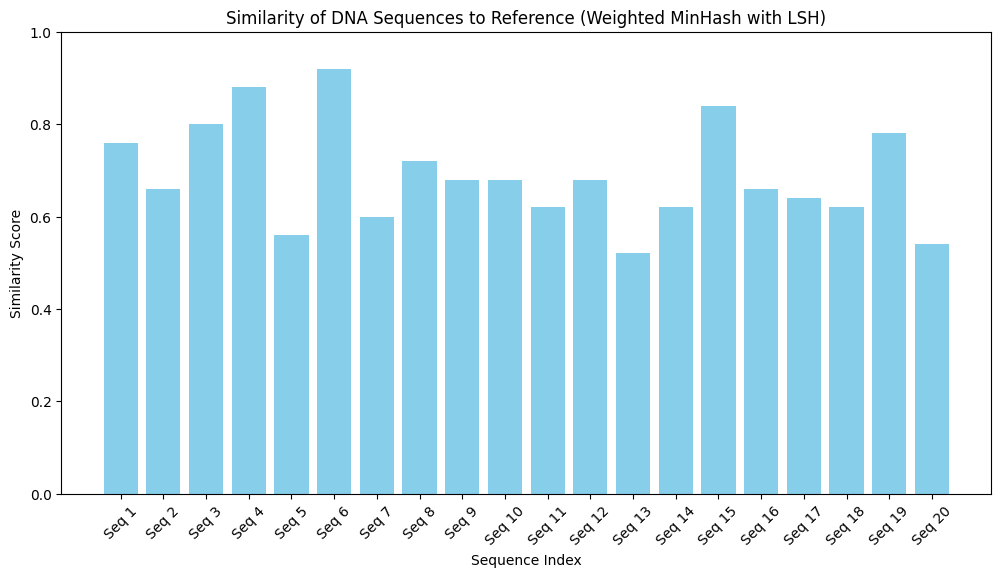

In [35]:
# TODO


## Step 7: Real-World Applications

### Applications:
1. **Genome Alignment**:
   - Identify the sequence in the dataset most similar to the reference.

2. **Duplicate Detection**:
   - Detect nearly identical sequences based on a similarity threshold (e.g., 0.9).

### Instructions for Implementation:
1. Sort or filter sequences based on their similarity scores.
2. Use the results to identify the most similar sequence or detect duplicates.


In [37]:
# TODO


Real-World Application 1: Genome Alignment
Sequence 6 is most similar to the reference.

Real-World Application 2: Duplicate Sequence Detection
Sequences [4, 6, 15] are potential duplicates.
